In [7]:
from mirror_gates.sycamore import syc
from transpile_benchy.utilities.numerical_decomp import (
    Advanced2QDecomposer,
    BasicDecomposer,
)
from qiskit import QuantumCircuit
from qiskit.quantum_info import Operator
from qiskit.circuit.parameter import Parameter
from qiskit.circuit.library import CXGate, SwapGate

decomposer = BasicDecomposer(basis_gates=[(syc, 2)])

from qiskit.transpiler.passes import Optimize1qGates
from qiskit.transpiler import PassManager

Final cost:  1.0142775508370505e-11


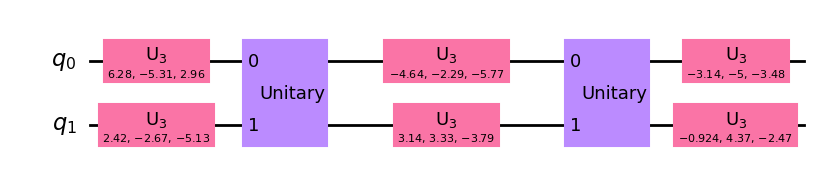

In [8]:
ansatz = QuantumCircuit(2)
ansatz.u(Parameter("p000"), Parameter("p001"), Parameter("p002"), 0)
ansatz.u(Parameter("q000"), Parameter("q001"), Parameter("q002"), 1)
ansatz.append(syc, [0, 1])
ansatz.u(Parameter("p003"), Parameter("p004"), Parameter("p005"), 0)
ansatz.u(Parameter("q003"), Parameter("q004"), Parameter("q005"), 1)
ansatz.append(syc, [0, 1])
ansatz.u(Parameter("p006"), Parameter("p007"), Parameter("p008"), 0)
ansatz.u(Parameter("q006"), Parameter("q007"), Parameter("q008"), 1)
ret = decomposer.decompose_from_ansatz(target=CXGate(), ansatz=ansatz)
pm = PassManager()
pm.append(Optimize1qGates())
ret = pm.run(ret)
ret.draw("mpl")

In [9]:
ret.qasm(filename="d02_syc_cnot.qasm")

'OPENQASM 2.0;\ninclude "qelib1.inc";\ngate unitary q0,q1 { u(pi/2,pi/2,0) q0; u(0.7297147035725542,-pi/2,pi/2) q1; cx q0,q1; u(pi/2,-pi/2,-pi/2) q0; u(0.9817498751378533,-0.6405278637538672,-0.6405278637538672) q1; cx q0,q1; u(pi/12,0,pi/2) q0; u(2.090822159332339,-2.446835860047982,2.603927236866438) q1; cx q0,q1; u(pi/2,7*pi/12,pi/2) q0; u(pi/2,-2.1500785622180896,0) q1; }\nqreg q[2];\nu3(6.283178916958845,-5.310676059768193,2.955803032132598) q[0];\nu3(2.4215892860297674,-2.6661463510241687,-5.130855062916504) q[1];\nunitary q[0],q[1];\nu3(-4.640529553270085,-2.288356128133611,-5.772303062133274) q[0];\nu3(3.1415944729511582,3.329859232412612,-3.7931958671015633) q[1];\nunitary q[0],q[1];\nu3(-3.1415929067507564,-4.998826848474456,-3.481179229326132) q[0];\nu3(-0.9241784618955011,4.370015630501661,-2.474308539104233) q[1];\n'

Final cost:  1.2112422176357995e-11


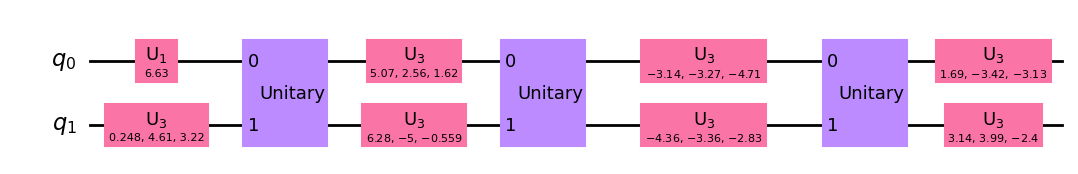

In [10]:
ansatz = QuantumCircuit(2)
ansatz.u(Parameter("p000"), Parameter("p001"), Parameter("p002"), 0)
ansatz.u(Parameter("q000"), Parameter("q001"), Parameter("q002"), 1)
ansatz.append(syc, [0, 1])
ansatz.u(Parameter("p003"), Parameter("p004"), Parameter("p005"), 0)
ansatz.u(Parameter("q003"), Parameter("q004"), Parameter("q005"), 1)
ansatz.append(syc, [0, 1])
ansatz.u(Parameter("p006"), Parameter("p007"), Parameter("p008"), 0)
ansatz.u(Parameter("q006"), Parameter("q007"), Parameter("q008"), 1)
ansatz.append(syc, [0, 1])
ansatz.u(Parameter("p009"), Parameter("p010"), Parameter("p011"), 0)
ansatz.u(Parameter("q009"), Parameter("q010"), Parameter("q011"), 1)
ret = decomposer.decompose_from_ansatz(target=SwapGate(), ansatz=ansatz)
pm.append(Optimize1qGates())
ret = pm.run(ret)
ret.draw("mpl")

In [11]:
ret.qasm(filename="d02_syc_swap.qasm")

'OPENQASM 2.0;\ninclude "qelib1.inc";\ngate unitary q0,q1 { u(pi/2,pi/2,0) q0; u(0.7297147035725542,-pi/2,pi/2) q1; cx q0,q1; u(pi/2,-pi/2,-pi/2) q0; u(0.9817498751378533,-0.6405278637538672,-0.6405278637538672) q1; cx q0,q1; u(pi/12,0,pi/2) q0; u(2.090822159332339,-2.446835860047982,2.603927236866438) q1; cx q0,q1; u(pi/2,7*pi/12,pi/2) q0; u(pi/2,-2.1500785622180896,0) q1; }\nqreg q[2];\nu1(6.633333356317586) q[0];\nu3(0.24750256162196735,4.609410253197844,3.2207025068223802) q[1];\nunitary q[0],q[1];\nu3(5.0691048685506255,2.5645436208258845,1.6214187869083594) q[0];\nu3(6.283182233142859,-4.997181843804259,-0.5593171903794606) q[1];\nunitary q[0],q[1];\nu3(-3.1415897272350533,-3.2731681671477535,-4.711803785625409) q[0];\nu3(-4.355674374763057,-3.3604740329054623,-2.8263375740075616) q[1];\nunitary q[0],q[1];\nu3(1.6850557650617017,-3.4180913705760414,-3.133214293072256) q[0];\nu3(3.1415961994876516,3.986145231269736,-2.3970427403931414) q[1];\n'